In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
mpl.style.use('default')

In [65]:
def create_corr_matrix(df, dwelling_id, annot):
    """
    Pearson correlation coefficient matrix. 
    The Pearson correlation coefficient is a measure of the linear correlation between two variables.
    """
    plt.clf()
    
    corr = df.corr()
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    if annot:
        fig, ax = plt.subplots(figsize=(25,25))
    else:
        fig, ax = plt.subplots()

    fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=annot, ax=ax, 
                cbar_kws={'label':'Pearson correlation coefficient [-]'})

    fig.set_title('Correlation matrix of dwelling ID: '+dwelling_id)
    fig.tick_params(axis='x', rotation=90)
    fig.tick_params(axis='y', rotation=0)

    fig = fig.get_figure()
    fig.tight_layout()
    fig.show()
    
    print('Saving heatmap')
    #fig.savefig('//datc//opschaler//EDA//Pearson_corr//' + dwelling_id + '.png', dpi=300)
    return fig

In [66]:
dir = '//datc//opschaler//combined_gas_smart_weather_dfs//processed//'
dwelling_id = 'P01S01W8655'
df = pd.read_csv(dir+dwelling_id+'_hour.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,777.974426,0.0,736.960999,0.0,153.765366,0.0,1591.657959,0.031982,255.050001,44.0,...,1014.933329,444.500000,0.0,1.276400,12.450000,13.983333,7.000000,68.833333,29966.666667,10.833333
2017-04-24 13:00:00,778.140198,0.0,736.960999,0.0,148.486038,0.0,1591.657959,0.000000,252.866666,58.0,...,1014.183339,410.333333,0.0,0.513033,12.766667,13.850000,6.533333,65.333333,36050.000000,32.666667
2017-04-24 14:00:00,778.333679,0.0,736.960999,0.0,214.163376,0.0,1591.657959,0.000000,259.849996,0.0,...,1013.616669,449.166667,0.0,1.507850,12.800000,14.266667,6.483333,65.000000,40366.666667,5.500000
2017-04-24 15:00:00,778.493530,0.0,736.960999,0.0,151.117645,0.0,1591.657959,0.000000,263.516665,0.0,...,1012.966665,356.000000,0.0,0.000000,12.400000,13.633334,6.600000,67.333333,34000.000000,2.000000
2017-04-24 16:00:00,778.654724,0.0,736.960999,0.0,180.759781,0.0,1591.657959,0.000000,252.883331,0.0,...,1012.083344,254.666667,0.0,0.130250,12.150000,13.033333,6.416667,67.333333,35150.000000,2.000000


Saving heatmap


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 640x480 with 0 Axes>

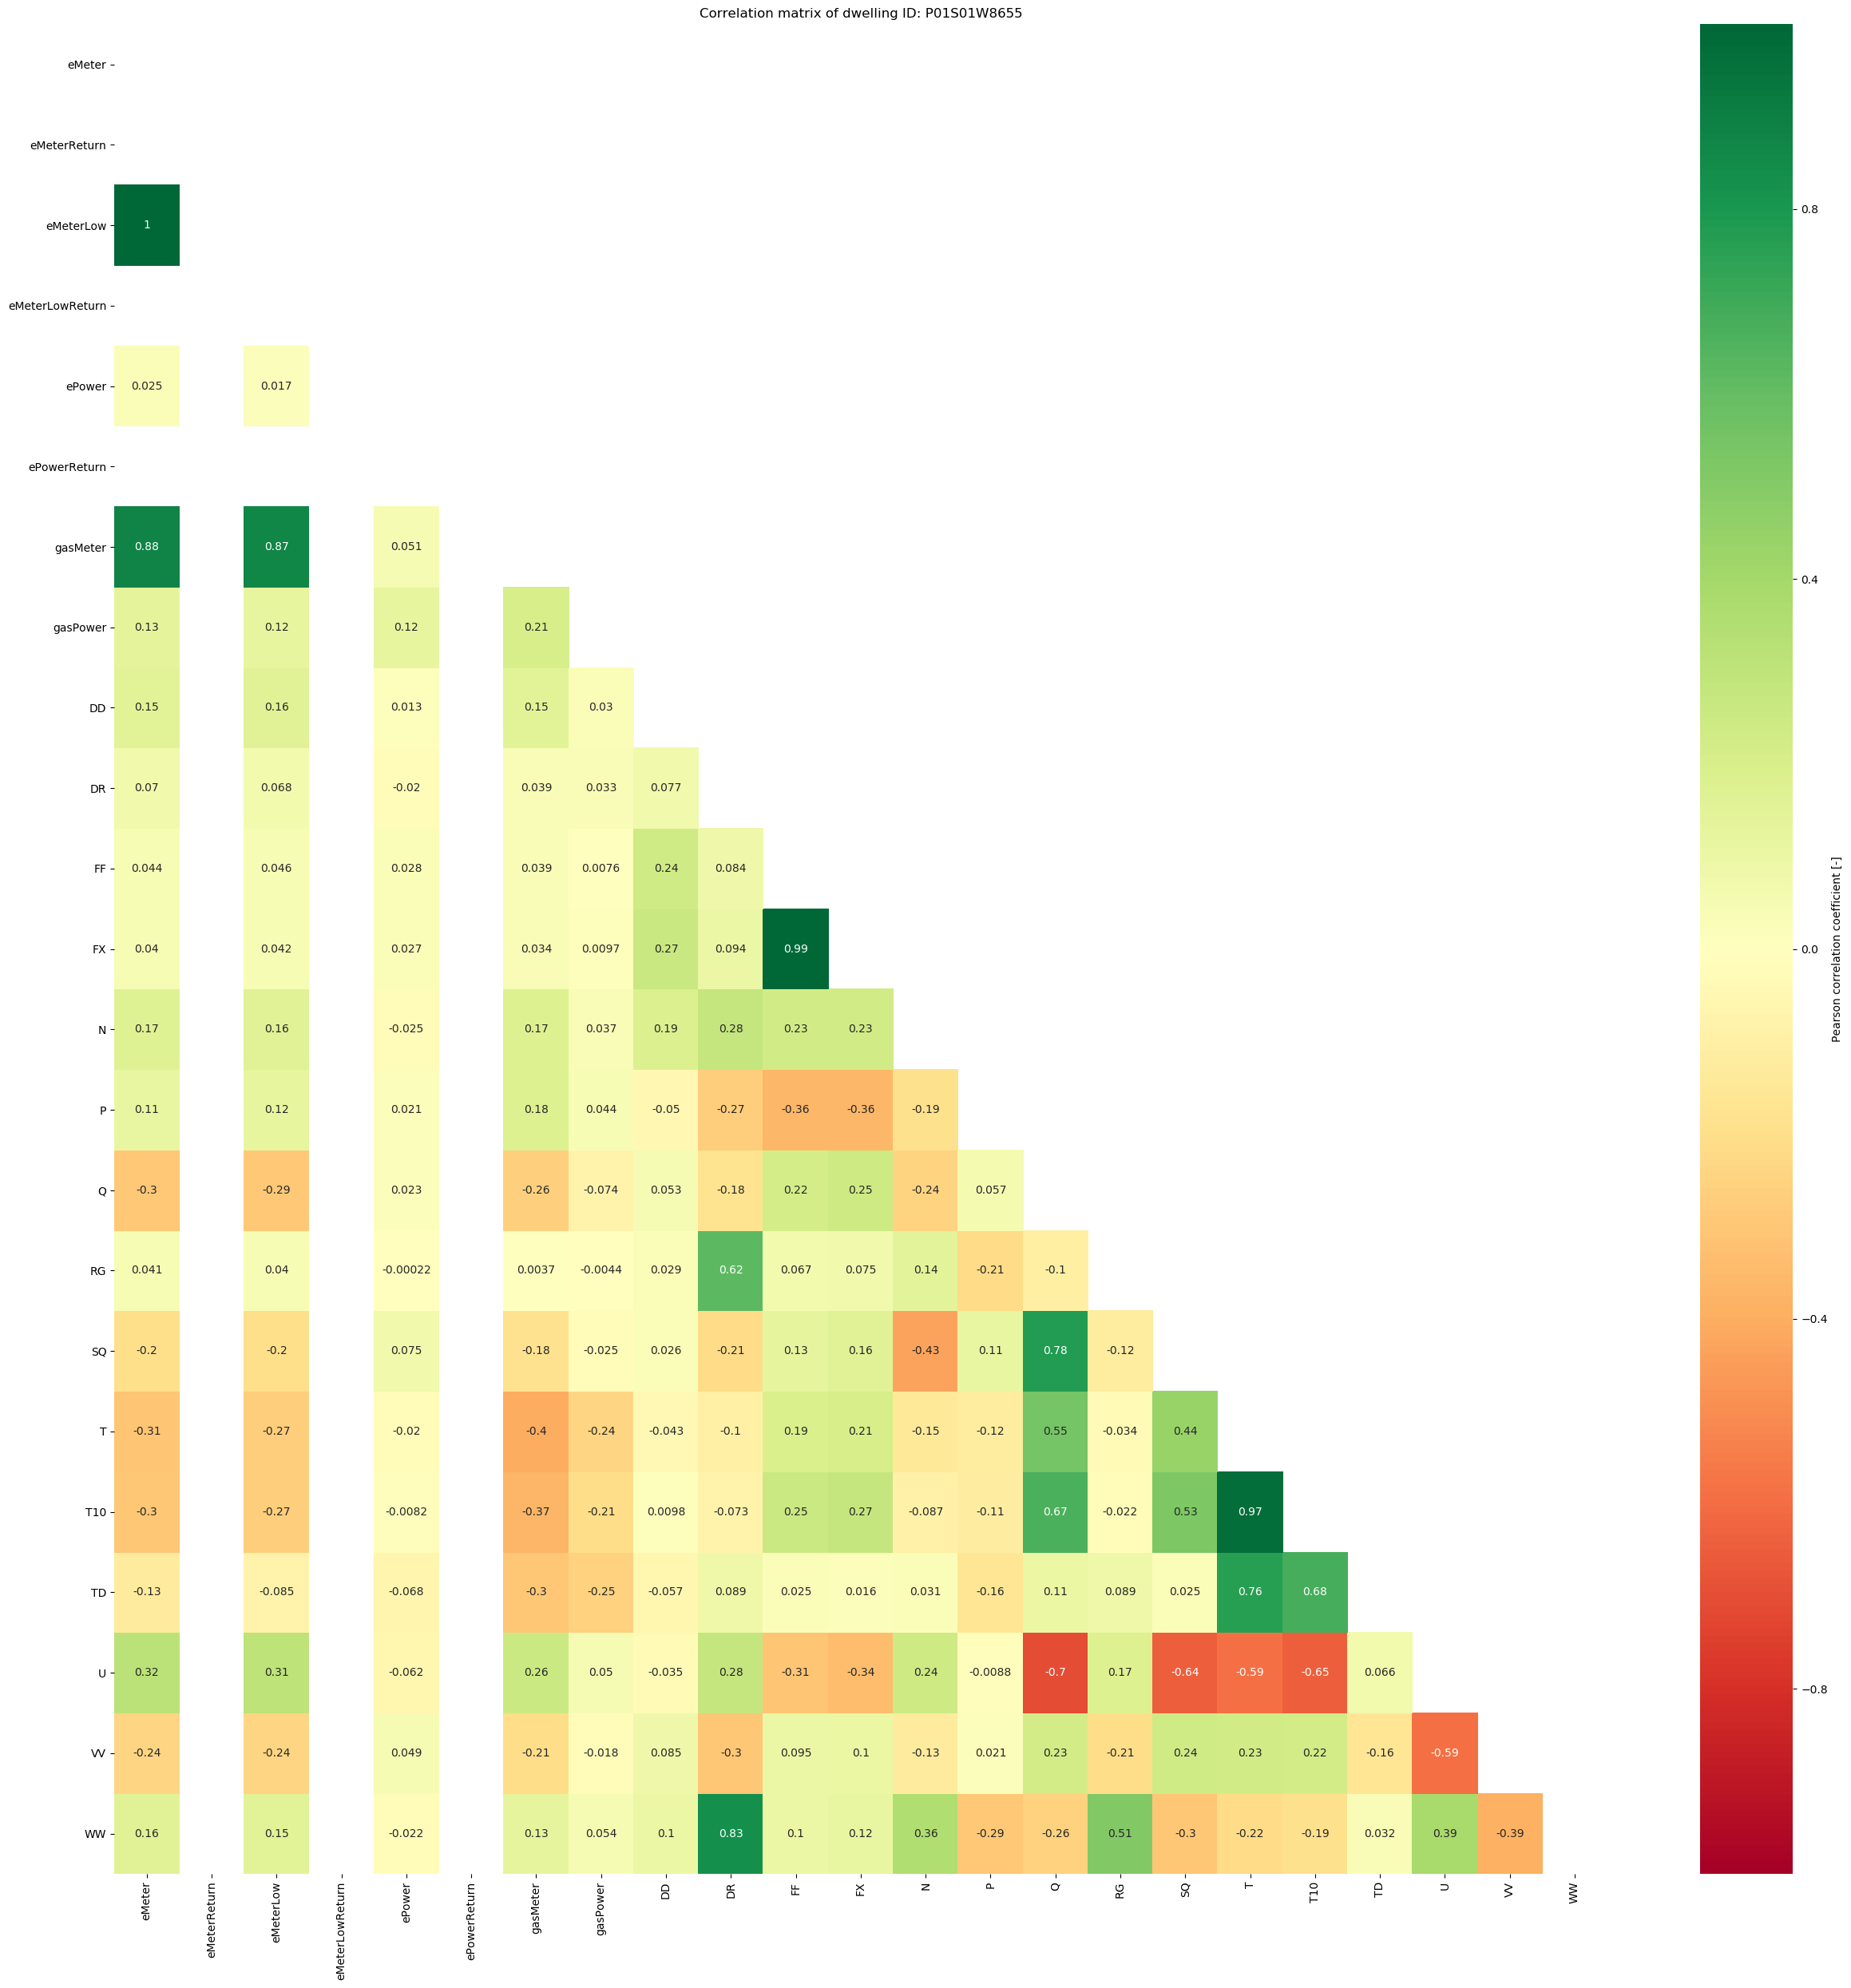

In [67]:
fig = create_corr_matrix(df, dwelling_id, True)

Saving heatmap


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 640x480 with 0 Axes>

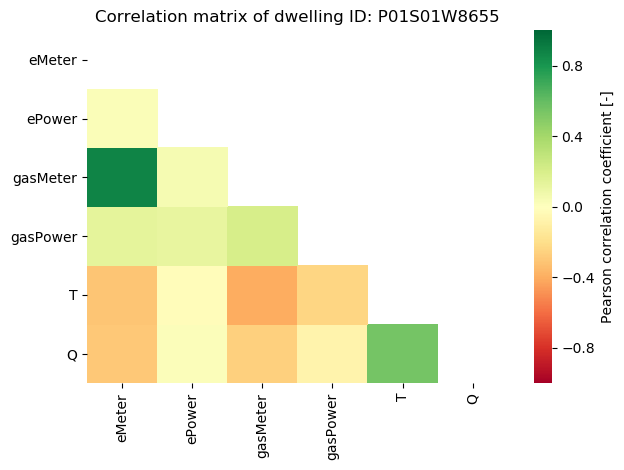

In [68]:
data = df[['eMeter', 'ePower', 'gasMeter', 'gasPower', 'T', 'Q']]
fig = create_corr_matrix(data, dwelling_id, False)

# Check for NaNs and get rid of them

In [69]:
data.isnull().sum()
data = data.dropna()

# More EDA

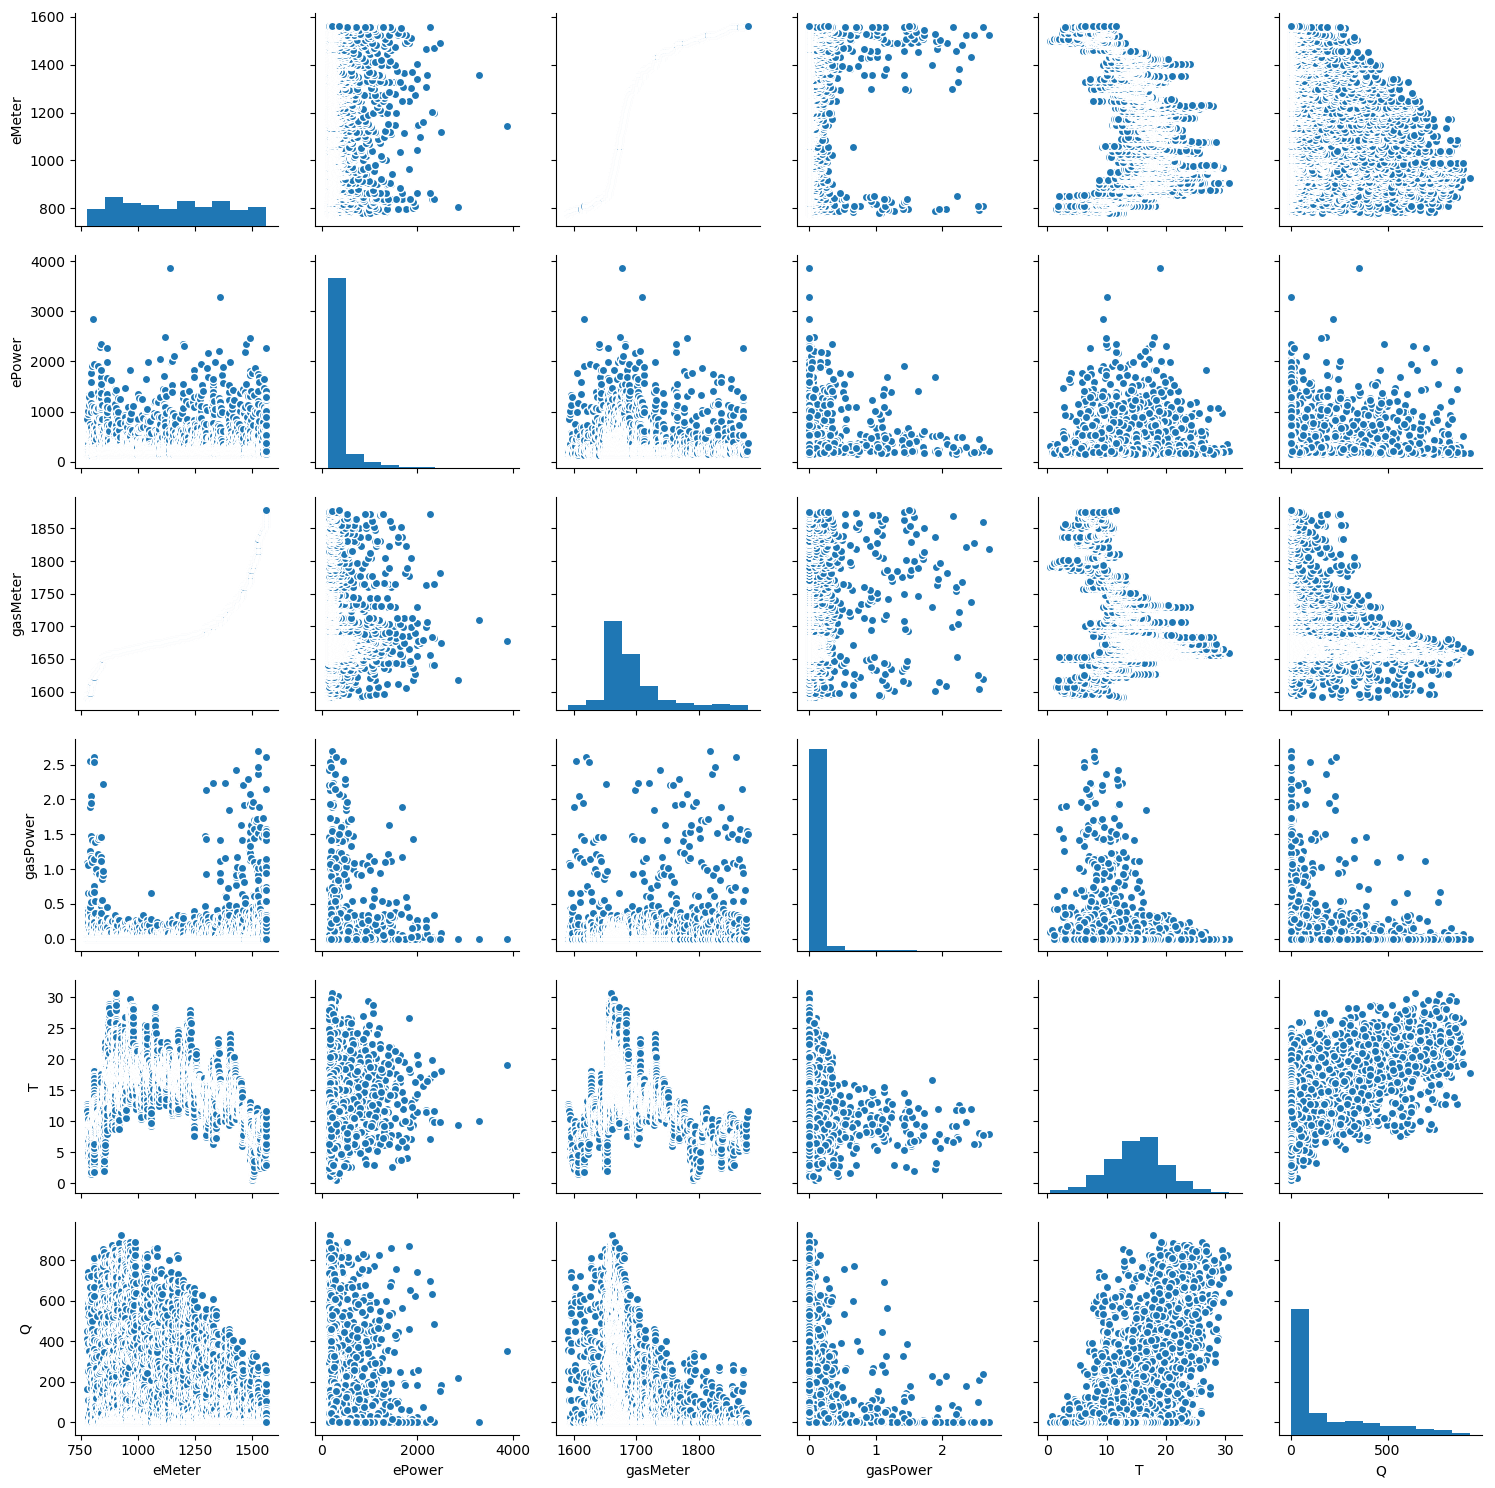

In [70]:
sns.pairplot(data)

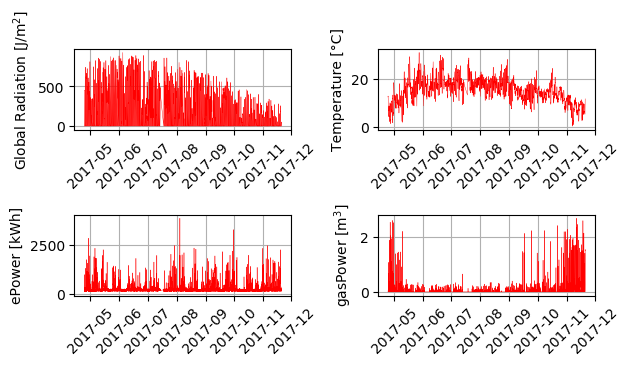

In [71]:
def datetime_layout():
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()

x = data.index

plt.subplot(3,2,1)
plt.plot(x, data['Q'], '-', color='r', linewidth=0.3)
#plt.xlabel('Date [-]')
plt.ylabel('Global Radiation [J/m$^2$]')
datetime_layout()

plt.subplot(3,2,2)
plt.plot(x, data['T'], '-', color='r', linewidth=0.3)
#plt.xlabel('Date [-]')
plt.ylabel('Temperature [°C]')
datetime_layout()

plt.subplot(3,2,3)
plt.plot(x, data['ePower'], '-', color='r', linewidth=0.3)
#plt.xlabel('Date [-]')
plt.ylabel('ePower [kWh]')
datetime_layout()

plt.subplot(3,2,4)
plt.plot(x, data['gasPower'], '-', color='r', linewidth=0.3)
#plt.xlabel('Date [-]')
plt.ylabel('gasPower [m$^3$]')
datetime_layout()

# Lets just look at gasPower

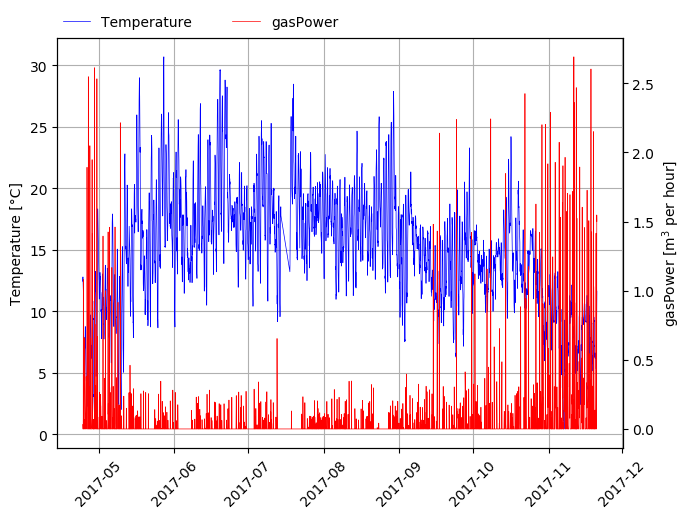

In [72]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['T'], 'b-', linewidth=0.5, label='Temperature')
ax.set_ylabel('Temperature [°C]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False) # Put legend on custom location
# more legend info: https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/

ax = ax.twinx() 
ax.plot(x, data.gasPower, 'r-', linewidth=0.5, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')

ax.legend(loc='lower left', bbox_to_anchor= (0.3, 1.01), borderaxespad=0, frameon=False)

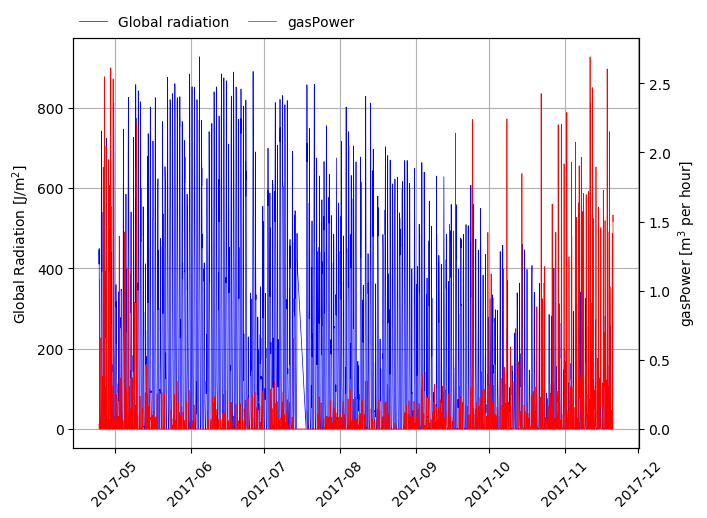

In [73]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['Q'], 'b-', linewidth=0.5, label='Global radiation')
ax.set_ylabel('Global Radiation [J/m$^2$]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False) # Put legend on custom location
# more legend info: https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/

ax = ax.twinx() 
ax.plot(x, data.gasPower, 'r-', linewidth=0.5, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')

ax.legend(loc='lower left', bbox_to_anchor= (0.3, 1.01), borderaxespad=0, frameon=False)

Looks like Q and T have an effect on gasPower. When Q, T are high, gasPower is low and vice versa.

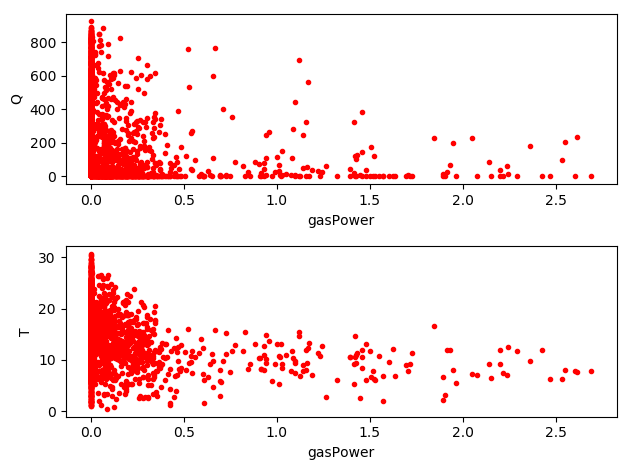

In [74]:
x = data.gasPower

plt.subplot(2,1,1)
plt.plot(x, data['Q'], '.', color='r', linewidth=0.3)
plt.xlabel('gasPower')
plt.ylabel('Q')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x, data['T'], '.', color='r', linewidth=0.3)
plt.xlabel('gasPower')
plt.ylabel('T')
plt.tight_layout()

# Multivariable linear regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['T', 'Q']]
y = data['gasPower']

X = np.array(X).reshape(-1,2) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
model.score(X_test, y_test)

0.070266191505384712

It sucks

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = df.dropna() 


X = df.drop(['gasPower', 'gasMeter'], axis=1)
y = df['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # Still sucks

0.096405071940227627

In [78]:
df.columns

Index(['eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'ePower',
       'ePowerReturn', 'gasMeter', 'gasPower', 'DD', 'DR', 'FF', 'FX', 'N',
       'P', 'Q', 'RG', 'SQ', 'T', 'T10', 'TD', 'U', 'VV', 'WW'],
      dtype='object')

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = df.dropna() 


X = df.drop(['gasPower', 'gasMeter', 'eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'DD', 'WW', 'T10', 'DD', 'FX'], axis=1)
y = df['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # Still sucks and it's getting worse...

0.083745583224688391

# Stochastic Gradient Descent (linear)
http://scikit-learn.org/stable/modules/sgd.html

In [80]:
from sklearn.linear_model import SGDRegressor

df = df.dropna() 


X = df.drop(['gasPower', 'gasMeter', 'eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'DD', 'WW', 'T10', 'DD', 'FX'], axis=1)
y = df['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SGDRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1.0988220687605348e+36

# Resample the data to days and look at it again

In [81]:
data = df.resample('D').mean()
data = data.dropna()
#fig = create_corr_matrix(data, dwelling_id, True)

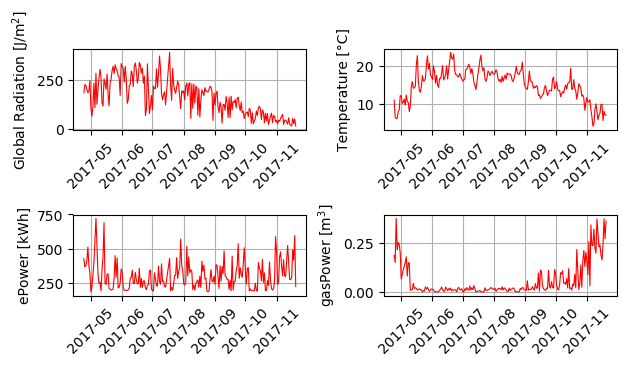

In [82]:
x = data.index

plt.subplot(3,2,1)
plt.plot(x, data['Q'], '-', color='r', linewidth=0.8)
#plt.xlabel('Date [-]')
plt.ylabel('Global Radiation [J/m$^2$]')
datetime_layout()

plt.subplot(3,2,2)
plt.plot(x, data['T'], '-', color='r', linewidth=0.8)
#plt.xlabel('Date [-]')
plt.ylabel('Temperature [°C]')
datetime_layout()

plt.subplot(3,2,3)
plt.plot(x, data['ePower'], '-', color='r', linewidth=0.8)
#plt.xlabel('Date [-]')
plt.ylabel('ePower [kWh]')
datetime_layout()

plt.subplot(3,2,4)
plt.plot(x, data['gasPower'], '-', color='r', linewidth=0.8)
#plt.xlabel('Date [-]')
plt.ylabel('gasPower [m$^3$]')
datetime_layout()

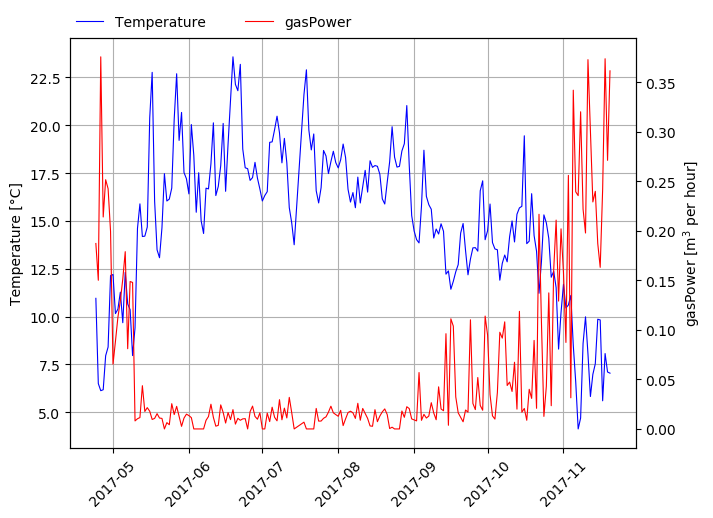

In [83]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['T'], 'b-', linewidth=0.8, label='Temperature')
ax.set_ylabel('Temperature [°C]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False) # Put legend on custom location
# more legend info: https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/

ax = ax.twinx() 
ax.plot(x, data.gasPower, 'r-', linewidth=0.8, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')

ax.legend(loc='lower left', bbox_to_anchor= (0.3, 1.01), borderaxespad=0, frameon=False)

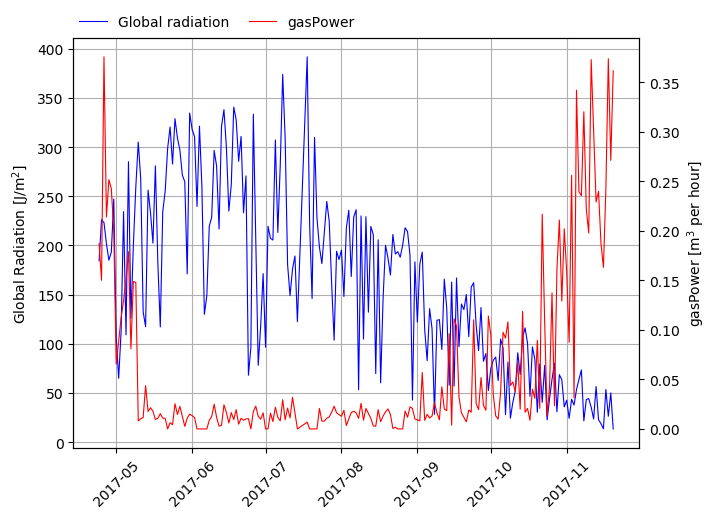

In [84]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['Q'], 'b-', linewidth=0.8, label='Global radiation')
ax.set_ylabel('Global Radiation [J/m$^2$]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False) # Put legend on custom location
# more legend info: https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/

ax = ax.twinx() 
ax.plot(x, data.gasPower, 'r-', linewidth=0.8, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')

ax.legend(loc='lower left', bbox_to_anchor= (0.3, 1.01), borderaxespad=0, frameon=False)

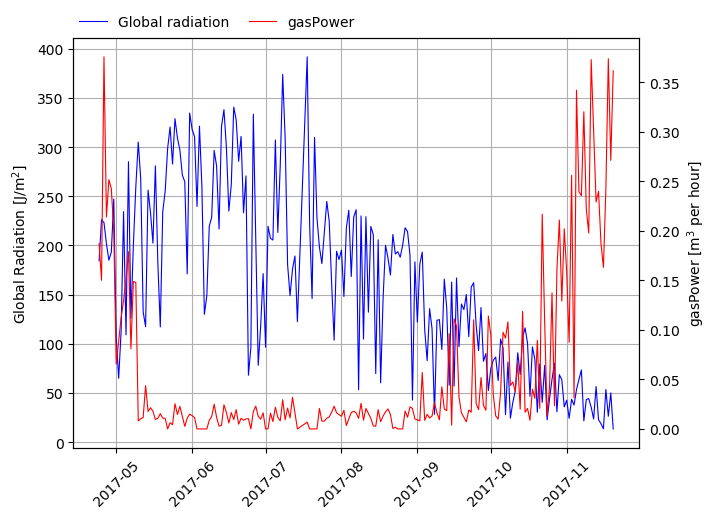

In [85]:
fig, ax = plt.subplots()
datetime_layout()

ax.plot(x, data['Q'], 'b-', linewidth=0.8, label='Global radiation')
ax.set_ylabel('Global Radiation [J/m$^2$]')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False) # Put legend on custom location
# more legend info: https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/

ax = ax.twinx() 
ax.plot(x, data.gasPower, 'r-', linewidth=0.8, label='gasPower')
ax.set_ylabel('gasPower [m$^3$ per hour]')

ax.legend(loc='lower left', bbox_to_anchor= (0.3, 1.01), borderaxespad=0, frameon=False)

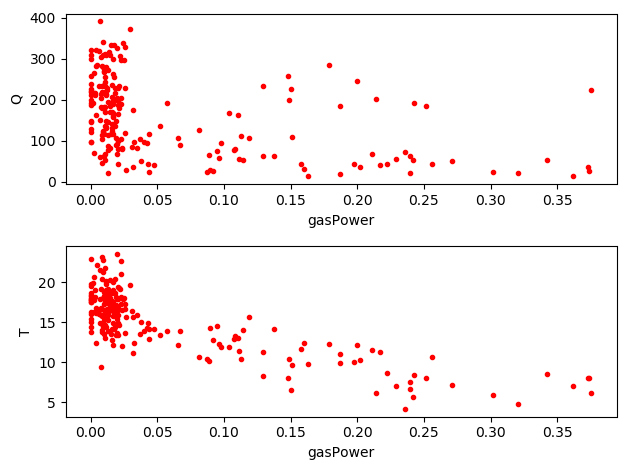

In [86]:
x = data.gasPower

plt.subplot(2,1,1)
plt.plot(x, data['Q'], '.', color='r', linewidth=0.3)
plt.xlabel('gasPower')
plt.ylabel('Q')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x, data['T'], '.', color='r', linewidth=0.3)
plt.xlabel('gasPower')
plt.ylabel('T')
plt.tight_layout()

T, gasPower looks promising

# Linear regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['T']]
y = data['gasPower']

X = np.array(X).reshape(-1,1) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.58723933827187702

# Multivariable linear regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = data.drop(['gasPower', 'gasMeter', 'eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'DD', 'WW', 'T10', 'DD', 'FX'], axis=1)
print('X columns: %s' % list(X.columns))
y = data['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

X columns: ['ePower', 'ePowerReturn', 'DR', 'FF', 'N', 'P', 'Q', 'RG', 'SQ', 'T', 'TD', 'U', 'VV']


0.61109557788202551

# Stochastic Gradient Descent (linear, also it probably is not applied correclty)

In [26]:
from sklearn.linear_model import SGDRegressor

X = data.drop(['gasPower', 'gasMeter', 'eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'DD', 'WW', 'T10', 'DD', 'FX'], axis=1)
y = data['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SGDRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-7.5087707519663802e+37

# Closer look at multivariable linear regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Nobody turns on their heating when T > 23, so drop this data
filtered = data[data['T'] < 22]



X = filtered.drop(['gasPower', 'gasMeter', 'eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'DD', 'WW', 'T10', 'DD', 'FX'], axis=1)
print('X columns: %s' % list(X.columns))
y = filtered['gasPower']

X = np.array(X).reshape(-1,len(X.columns)) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

X columns: ['ePower', 'ePowerReturn', 'DR', 'FF', 'N', 'P', 'Q', 'RG', 'SQ', 'T', 'TD', 'U', 'VV']


0.60426385205958466

filtering for T < 22 does not make a lot of diffence

# Create some plots

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.23,'1 Day mean of dwelling: P01S01W8655')

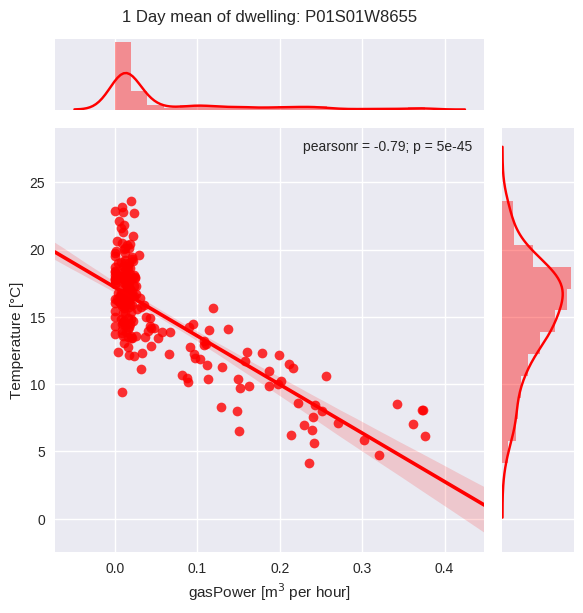

In [57]:
fig = sns.jointplot(x="gasPower", y="T", data=data, kind="reg", color='r')
sns.plt.xlabel('gasPower [m$^3$ per hour]')
sns.plt.ylabel('Temperature [°C]')
sns.plt.tight_layout()
sns.plt.title('1 Day mean of dwelling: %s' % dwelling_id, y=1.23)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.23,'1 Day mean of dwelling: P01S01W8655')

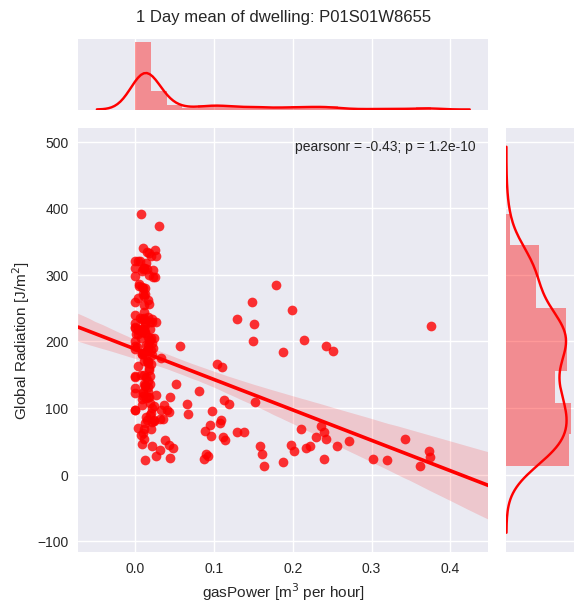

In [52]:
fig = sns.jointplot(x="gasPower", y="Q", data=data, kind="reg", color='r')
sns.plt.xlabel('gasPower [m$^3$ per hour]')
sns.plt.ylabel('Global Radiation [J/m$^2$]')
sns.plt.tight_layout()
sns.plt.title('1 Day mean of dwelling: %s' % dwelling_id, y=1.23)

# Results, hour samplerate

Just need to create a nice presentable result